# Image Data Exploration

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from IPython.display import display, Image
from scipy import ndimage
import cv2
import imutils

# Config the matplotlib backend as plotting inline in IPython
%matplotlib notebook

## 1. Check image

Images are calssified into two categories which are authorized and unauthorized. Unauthorized images are downloaded from [Labeled faces in the Wild Home](http://vis-www.cs.umass.edu/lfw/#deep_funnel_cite). Authorized images are taken by myself and trimmed with the similar size (250 pixel x 250 pixel) as those unauthorized images. These two groups of images are stored in unauthorized and authorized folder and their subfolders, respectively.

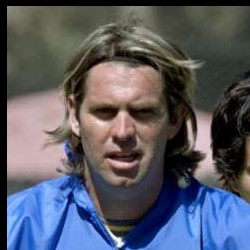

In [2]:
unauthorized_images = os.listdir(r'C:\Users\dbsnail\ImageFolder\data_large\unauthorized\lfw\Leonardo_Fernandez')
display(Image(filename = os.path.join(r'C:\Users\dbsnail\ImageFolder\data_large\unauthorized\lfw\Leonardo_Fernandez', unauthorized_images[0])))

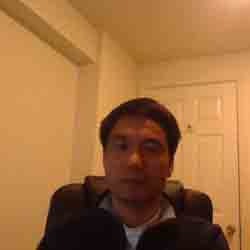

In [3]:
authorized_images = os.listdir(r'C:/Users/dbsnail/ImageFolder/data_large/authorized')
display(Image(filename = os.path.join(r'C:/Users/dbsnail/ImageFolder/data_large/authorized', authorized_images[100])))

## 2. Use OpenCV extract basic image information

In [4]:
img_path = r'C:\Users\dbsnail\ImageFolder\data_large\unauthorized\lfw\Leonardo_Fernandez\Leonardo_Fernandez_0001.jpg'
img = cv2.imread(img_path, 0)  # remove '0' argument will show color image
cv2.imshow('image',img)
cv2.waitKey()    # if 0 is passed, it waits indefinitely for a key stroke
cv2.destroyAllWindows()

In [5]:
img.shape  ##height, width

(250, 250)

In [6]:
#read color image
img = cv2.imread(img_path) 
img.shape  ##height, width, channel

(250, 250, 3)

In [7]:
img.size

187500

## Laplacian

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # another way to convert to gray color
lap =  cv2.Laplacian(img, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2.imshow("Laplacian", lap)
cv2.waitKey()    # if 0 is passed, it waits indefinitely for a key stroke
cv2.destroyAllWindows()

## Sobel

In [9]:
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

cv2.imshow("Sobel X", sobelX)
cv2.imshow("Sobel Y", sobelY)
cv2.imshow("Sobel Combined", sobelCombined)
cv2.waitKey()
cv2.destroyAllWindows()

## Canny

In [10]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5, 5), 0)
cv2.imshow("Blurred", image)  # By applying a blur prior to edge detection, help remove “noisy” edges in the image 

canny = cv2.Canny(image, 30, 150)
cv2.imshow("Canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()

## 3. Use imutils for translation, rotation, resizing
Because of the limited number, authorized images are transformed using imutils as the tool. For detail information, please check [adrian rosebrock's blog](http://www.pyimagesearch.com/2015/02/02/just-open-sourced-personal-imutils-package-series-opencv-convenience-functions/)

In [11]:
# Translation
image = cv2.imread(img_path)
cv2.imshow("Original", image)
translated = imutils.translate(image, 25, -75)
cv2.imshow("Original", translated)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
# rotation
image = cv2.imread(img_path)
for angle in range(0, 360, 90):
    # rotate the image and display it
    rotated = imutils.rotate(img, angle=angle)
    cv2.imshow("Angle=%d" % (angle), rotated)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [13]:
# loop over varying widths to resize the image to
image = cv2.imread(img_path)
for width in (400, 300, 200, 100):
    # resize the image and display it
    resized = imutils.resize(image, height=width)
    print(resized.shape)
    cv2.imshow("Width=%dpx" % (width), resized)
    cv2.waitKey()
    cv2.destroyAllWindows()

(400, 400, 3)
(300, 300, 3)
(200, 200, 3)
(100, 100, 3)
